# Digit Classification using Dense Neural Network (DNN) 

**NOTE**: Confirm if Runtime Type is set to: `GPU`

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
**MNIST** handwritten digits dataset

The MNIST database of handwritten digits, available from this [page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 28x28 grayscale images of the 10 digits along a test set of 10,000 images. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">


In [2]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


### Exploring Labels

In [5]:
training_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

It is possible to keep training labels as "numbers", but in this case when compiling the model, you should use: `loss="sparse_categorical_crossentropy".`

**And how about changing labels to categorical?**

In [6]:
training_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical
to_categorical(training_labels[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

When labels are defined as categories, when compiling the model you should use: `loss="categorical_crossentropy".`

### Exploring images

In [8]:
np.set_printoptions(linewidth=200)
print(training_images[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

In [9]:
training_labels[2]

4

     Label of image 2 is: 4


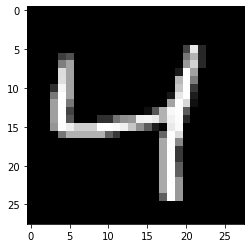

In [11]:
img = 2
print("     Label of image {} is: {}".format(img, training_labels[img]))
plt.imshow(training_images[img], cmap='gray');

In [12]:
training_images.max()

255

In [13]:
training_images.min()

0

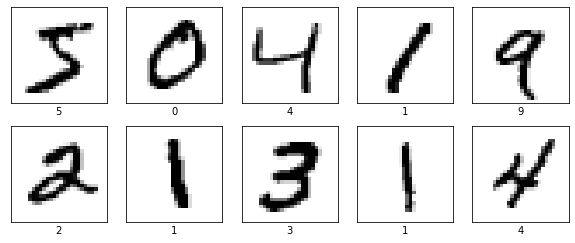

In [24]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap='binary') # cmap = 'gray'
    plt.xlabel(training_labels[i])

### Preprocessing Data 

**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [14]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

In [15]:
print(training_images[2])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

In [16]:
training_images.max()

1.0

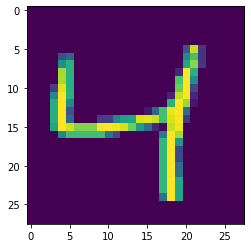

In [17]:
plt.imshow(training_images[2]);

## Define and Compile Model

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array 
    metrics=['accuracy'] # Calculates how often predictions equal labels
    )

## Train the model

In [27]:
%%time
history = model.fit(
    training_images, 
    training_labels, 
    epochs=20, 
    )

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4175 - accuracy: 0.8833
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2410 - accuracy: 0.9309
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2030 - accuracy: 0.9413
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1797 - accuracy: 0.9479
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1628 - accuracy: 0.9523
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1515 - accuracy: 0.9553
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1422 - accuracy: 0.9586
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9603
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1285 - accuracy: 0.9625
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.123

Inspecting the model

In [28]:
train_eval = model.evaluate(training_images, training_labels)
print ("Training data Accuracy: {:.1f}%".format(train_eval[1]*100))

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0778 - accuracy: 0.9773
Training data Accuracy: 97.7%


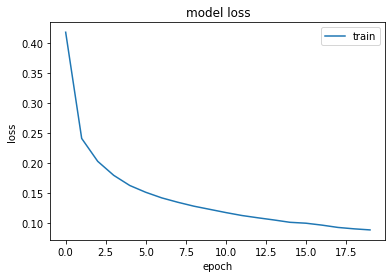

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

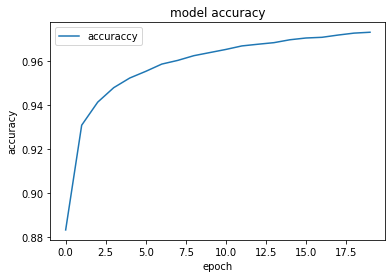

In [30]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Testing the trained model

Using `model.evaluate`, you can get metrics for a test set. In this case we only have a training set and a validation set, so we can try it out with the validation set. The accuracy will be slightly lower, at maybe 96%. This is because the model hasn't previously seen this data and may not be fully generalized for all data. Still it's a pretty good score.
You can also predict images, and compare against their actual label. The [0] image in the set is a number 7, and here you can see that neuron 7 has a 9.9e-1 (99%+) probability, so it got it right!

In [31]:
test_eval = model.evaluate(val_images, val_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9600
Testing data Accuracy: 96.0%


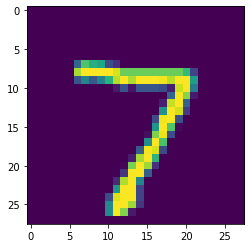

In [32]:
plt.imshow(val_images[0]);

In [33]:
print(val_labels[0])

7


In [36]:
classifications = model.predict(val_images)
classifications.shape

(10000, 10)

In [40]:
classifications[0]

array([2.07621110e-06, 3.96049804e-10, 1.03758044e-04, 1.03494134e-02, 5.39935284e-11, 1.24505432e-05, 3.85072359e-14, 9.89505589e-01, 7.58834676e-06, 1.90185365e-05], dtype=float32)

In [38]:
# Returns the indices of the maximum values along an axis.
np.argmax(classifications[0])

7

## Inspecting Errors

In [41]:
predict_errors = []
for i in range(len(val_labels)):
  predicted_label = np.argmax(classifications[i])
  if predicted_label != val_labels[i]:
    predict_errors.append(i)

print(1-(len(predict_errors)/len(val_labels)))

0.96


In [42]:
predict_errors[:10]

[33, 62, 66, 124, 151, 233, 241, 247, 259, 321]

    Real label of image 33 is: 4
 Predict label of image 33 is: 0


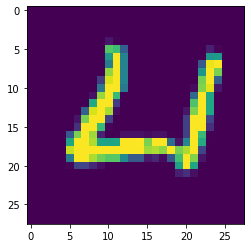

In [45]:
i = predict_errors[0]
predicted_label = np.argmax(classifications[i])
print("    Real label of image {} is: {}".format(i, val_labels[i]))
print(" Predict label of image {} is: {}".format(i, predicted_label))
plt.imshow(val_images[i]);

## Modify to inspect learned values

This code is identical, except that the layers are named prior to adding to the sequential. This allows us to inspect their learned parameters later.

In [46]:
layer_1 = tf.keras.layers.Dense(20, activation=tf.nn.relu)
layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    layer_1,
                                    layer_2])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, 
          training_labels, 
          epochs=20,
          verbose=0
          )

test_eval = model.evaluate(val_images, val_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1448 - accuracy: 0.9600
Testing data Accuracy: 96.0%


In [47]:
classifications = model.predict(val_images)
print(classifications[0])
print(np.argmax(classifications[0]))
print(val_labels[0])

[1.6059446e-06 8.3785917e-14 8.5839229e-06 8.3057089e-03 8.2769950e-15 2.4870616e-05 2.1908116e-14 9.9159396e-01 3.8256152e-05 2.7149130e-05]
7
7


Inspect Layer 1

In [48]:
print("Layer 1 Ws ==>", layer_1.get_weights()[0].size)
print("Layer 1 bs ==>", layer_1.get_weights()[1].size)

Layer 1 Ws ==> 15680
Layer 1 bs ==> 20


The `get_weights()[0]` contains the weights (Ws). Why we have 15,680 w's on layer 1? Recall that there are 20 neurons in the first layer and, that the images are 28x28 pixels, which is 784. So, if you multiply 784 x 20 you get 15,680.

This layer has 20 neurons, and each neuron learns a W parameter for each pixel. So instead of y=Mx+c, we have 
y=M1X1+M2X2+M3X3+....+M784X784+C in every neuron! Every pixel has a weight in every neuron. Those weights are multiplied by the pixel value, summed up, and given a bias.

The `get_weights()[1]` contains the biases (bs), one for each of the 20 neurons in this layer.


Inspect Layer 2

In [49]:
print("Layer 2 Ws ==>", layer_2.get_weights()[0].size)
print("Layer 2 bs ==>", layer_2.get_weights()[1].size)

Layer 2 Ws ==> 200
Layer 2 bs ==> 10


Layer 2 has 200 Ws. This is because are 10 neurons in this layer, but there are 20 neurons in the previous layer. So, each neuron in this layer will learn a weight for the incoming value from the previous layer. So, for example, the if the first neuron in this layer is N21, and the neurons output from the previous layers are N11-N120, then this neuron will have 20 weights (W1-W20) and it will calculate its output to be:

`W1N11+W2N12+W3N13+...+W20N120+Bias`

So each of these weights will be learned as will the bias, for every neuron.

Note that N11 refers to Layer 1 Neuron 1.

...and as expected there are 10 elements in the second array, representing the 10 biases for the 10 neurons.
Hopefully this helps you see how the element of a simple neuron containing y=mx+c can be expanded greatly into a deep neural network, and that DNN can learn the parameters that match the 784 pixels of an image to their output!